![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [231]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head(10)
cc_apps.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,g,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,g,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,g,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,g,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,s,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,g,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,g,0,-


In [232]:
cc_apps.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

In [233]:
cc_apps.describe()

,2,7,10,12
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [234]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [235]:
cc_apps.iloc[:,1] = pd.to_numeric(cc_apps.iloc[:,1], errors='coerce')

print(cc_apps.iloc[:,1].dtype)

float64


In [236]:
num_cols=cc_apps.iloc[:,[1, 2, 7, 10, 12]]
cat_cols=cc_apps.iloc[:, [0,3,4,5,6,8,9,11,13]]
cat_cols.head()

,0,3,4,5,6,8,9,11,13
0,b,u,g,w,v,t,t,g,+
1,a,u,g,q,h,t,t,g,+
2,a,u,g,q,h,t,f,g,+
3,b,u,g,w,v,t,t,g,+
4,b,u,g,w,v,t,f,s,+


In [237]:
cc_apps.replace('?', np.nan, inplace=True)

print(cc_apps.isnull().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13     0
dtype: int64


In [238]:
print(cc_apps.isnull().any().sum())

6


In [239]:
cc_apps.dropna(inplace=True)


In [240]:
print(cc_apps.isnull().any().sum())

0


In [241]:
cc_apps.iloc[:,0].unique()

array(['b', 'a'], dtype=object)

In [242]:
cc_apps.iloc[:, 3].unique()

array(['u', 'y', 'l'], dtype=object)

In [243]:
cc_apps.iloc[:, 4].unique()

array(['g', 'p', 'gg'], dtype=object)

In [244]:
cc_apps.iloc[:,5].unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j'], dtype=object)

In [245]:
cc_apps.iloc[:, 6].unique()

array(['v', 'h', 'bb', 'ff', 'j', 'z', 'o', 'dd', 'n'], dtype=object)

In [246]:
cc_apps.iloc[:,8].unique()

array(['t', 'f'], dtype=object)

In [247]:
cc_apps.iloc[:, 9].unique()

array(['t', 'f'], dtype=object)

In [248]:
cc_apps.iloc[:,11].unique()


array(['g', 's', 'p'], dtype=object)

In [249]:
cc_apps.iloc[:,13].unique()

array(['+', '-'], dtype=object)

In [250]:

cat_cols_indices = [3, 4, 5, 6, 11]

cat_cols_dummies = cc_apps.columns[cat_cols_indices].tolist()

cc_apps = pd.get_dummies(data=cc_apps, columns=cat_cols_dummies, drop_first=True)

print(cc_apps.head())


   0      1      2     7  8  9  10  ...  6_j 6_n  6_o  6_v  6_z  11_p  11_s
0  b  30.83  0.000  1.25  t  t   1  ...    0   0    0    1    0     0     0
1  a  58.67  4.460  3.04  t  t   6  ...    0   0    0    0    0     0     0
2  a  24.50  0.500  1.50  t  f   0  ...    0   0    0    0    0     0     0
3  b  27.83  1.540  3.75  t  t   5  ...    0   0    0    1    0     0     0
4  b  20.17  5.625  1.71  t  f   0  ...    0   0    0    1    0     0     1

[5 rows x 36 columns]


In [251]:
dict_col13={'+':1, '-':0}
dict_col9={'t':1, 'f':0}
dict_col8={'t':1, 'f':0}
dict_col0={'b':1, 'a':0}
cc_apps.iloc[:, 13] = cc_apps.iloc[:, 13].replace(dict_col13)
cc_apps.iloc[:, 9] = cc_apps.iloc[:, 9].replace(dict_col9)
cc_apps.iloc[:, 8] = cc_apps.iloc[:, 8].replace(dict_col8)
cc_apps.iloc[:, 0] = cc_apps.iloc[:, 0].replace(dict_col0)
print(cc_apps.head())

   0      1      2     7  8  9  10  ...  6_j 6_n  6_o  6_v  6_z  11_p  11_s
0  1  30.83  0.000  1.25  t  t   1  ...    0   0    0    1    0     0     0
1  0  58.67  4.460  3.04  t  t   6  ...    0   0    0    0    0     0     0
2  0  24.50  0.500  1.50  t  f   0  ...    0   0    0    0    0     0     0
3  1  27.83  1.540  3.75  t  t   5  ...    0   0    0    1    0     0     0
4  1  20.17  5.625  1.71  t  f   0  ...    0   0    0    1    0     0     1

[5 rows x 36 columns]


In [252]:
print(cc_apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 689
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       659 non-null    int64  
 1   1       659 non-null    float64
 2   2       659 non-null    float64
 3   7       659 non-null    float64
 4   8       659 non-null    object 
 5   9       659 non-null    object 
 6   10      659 non-null    int64  
 7   12      659 non-null    int64  
 8   13      659 non-null    object 
 9   3_u     659 non-null    uint8  
 10  3_y     659 non-null    uint8  
 11  4_gg    659 non-null    uint8  
 12  4_p     659 non-null    uint8  
 13  5_c     659 non-null    uint8  
 14  5_cc    659 non-null    uint8  
 15  5_d     659 non-null    uint8  
 16  5_e     659 non-null    uint8  
 17  5_ff    659 non-null    uint8  
 18  5_i     659 non-null    uint8  
 19  5_j     659 non-null    uint8  
 20  5_k     659 non-null    uint8  
 21  5_m     659 non-null    uint8  
 22  5_

In [253]:
uint8_cols = cc_apps.select_dtypes(include='uint8').columns
cc_apps[uint8_cols] = cc_apps[uint8_cols].astype(bool)

print(cc_apps.dtypes)

0         int64
1       float64
2       float64
7       float64
8        object
9        object
10        int64
12        int64
13       object
3_u        bool
3_y        bool
4_gg       bool
4_p        bool
5_c        bool
5_cc       bool
5_d        bool
5_e        bool
5_ff       bool
5_i        bool
5_j        bool
5_k        bool
5_m        bool
5_q        bool
5_r        bool
5_w        bool
5_x        bool
6_dd       bool
6_ff       bool
6_h        bool
6_j        bool
6_n        bool
6_o        bool
6_v        bool
6_z        bool
11_p       bool
11_s       bool
dtype: object


In [254]:
y=cc_apps.iloc[:, 13]
X=cc_apps.drop(columns=cc_apps.columns[13])

In [255]:
# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([8, 9, 13], dtype='object')


In [256]:
# Double-check that each column in non_numeric_cols exists in X
non_numeric_cols = [col for col in non_numeric_cols if col in X.columns]

# Verify the filtered non-numeric columns
print("Filtered non-numeric columns:", non_numeric_cols)

# Apply pd.get_dummies() only on existing non-numeric columns
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Verify the result
print(X.head())


Filtered non-numeric columns: [8, 9, 13]
   0      1      2     7  10   12  ...    6_z   11_p   11_s  8_t  9_t  13_-
0  1  30.83  0.000  1.25   1    0  ...  False  False  False    1    1     0
1  0  58.67  4.460  3.04   6  560  ...  False  False  False    1    1     0
2  0  24.50  0.500  1.50   0  824  ...  False  False  False    1    0     0
3  1  27.83  1.540  3.75   5    3  ...  False  False  False    1    1     0
4  1  20.17  5.625  1.71   0    0  ...  False  False   True    1    0     0

[5 rows x 35 columns]


In [257]:
sc=StandardScaler()
X.columns=X.columns.astype(str)
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)


In [258]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

In [259]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Yes', 'No'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [260]:
lg=LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

       False       0.98      0.92      0.95       367
        True       0.75      0.94      0.83        94

    accuracy                           0.92       461
   macro avg       0.86      0.93      0.89       461
weighted avg       0.93      0.92      0.93       461



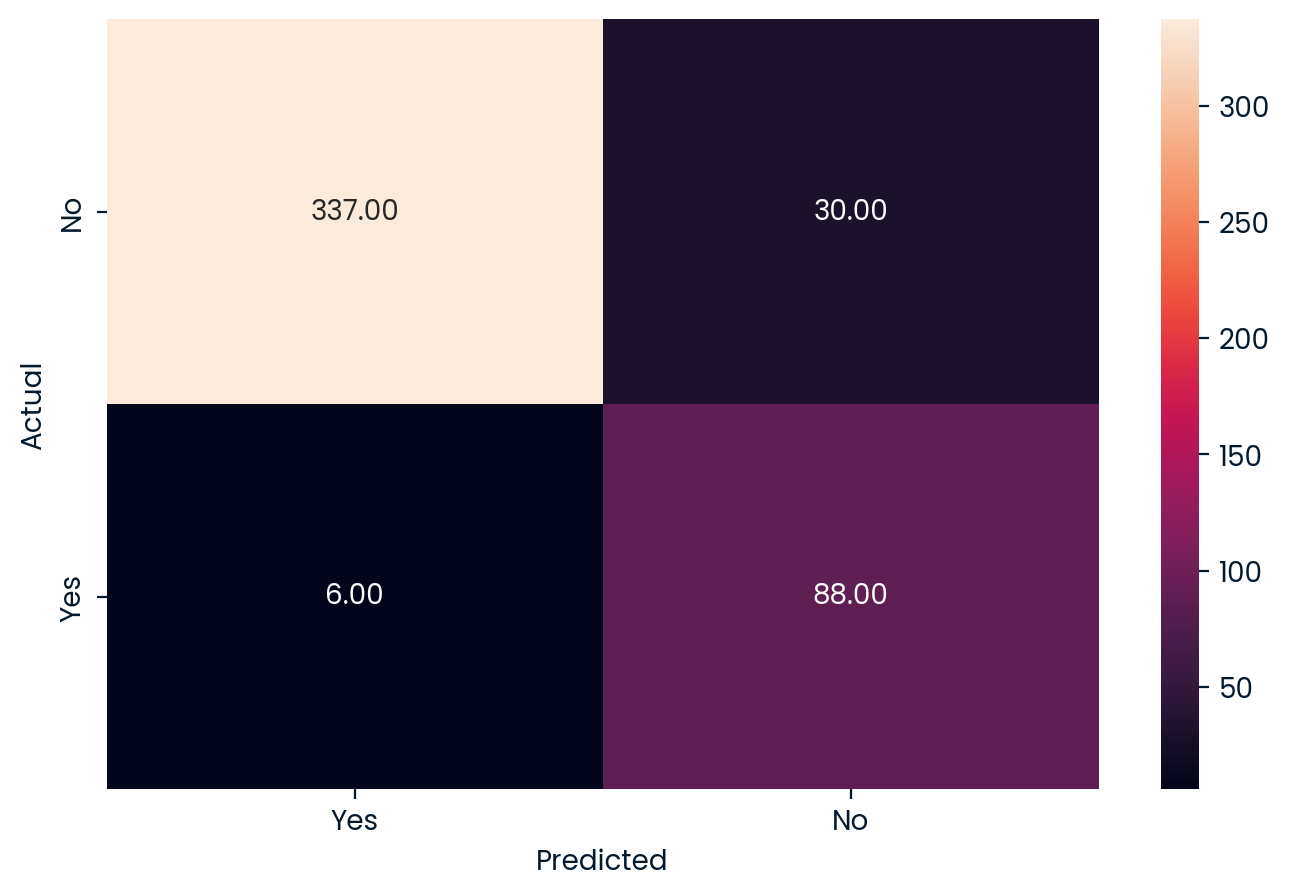

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train= lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

       False       0.94      0.97      0.95       152
        True       0.90      0.78      0.84        46

    accuracy                           0.93       198
   macro avg       0.92      0.88      0.90       198
weighted avg       0.93      0.93      0.93       198



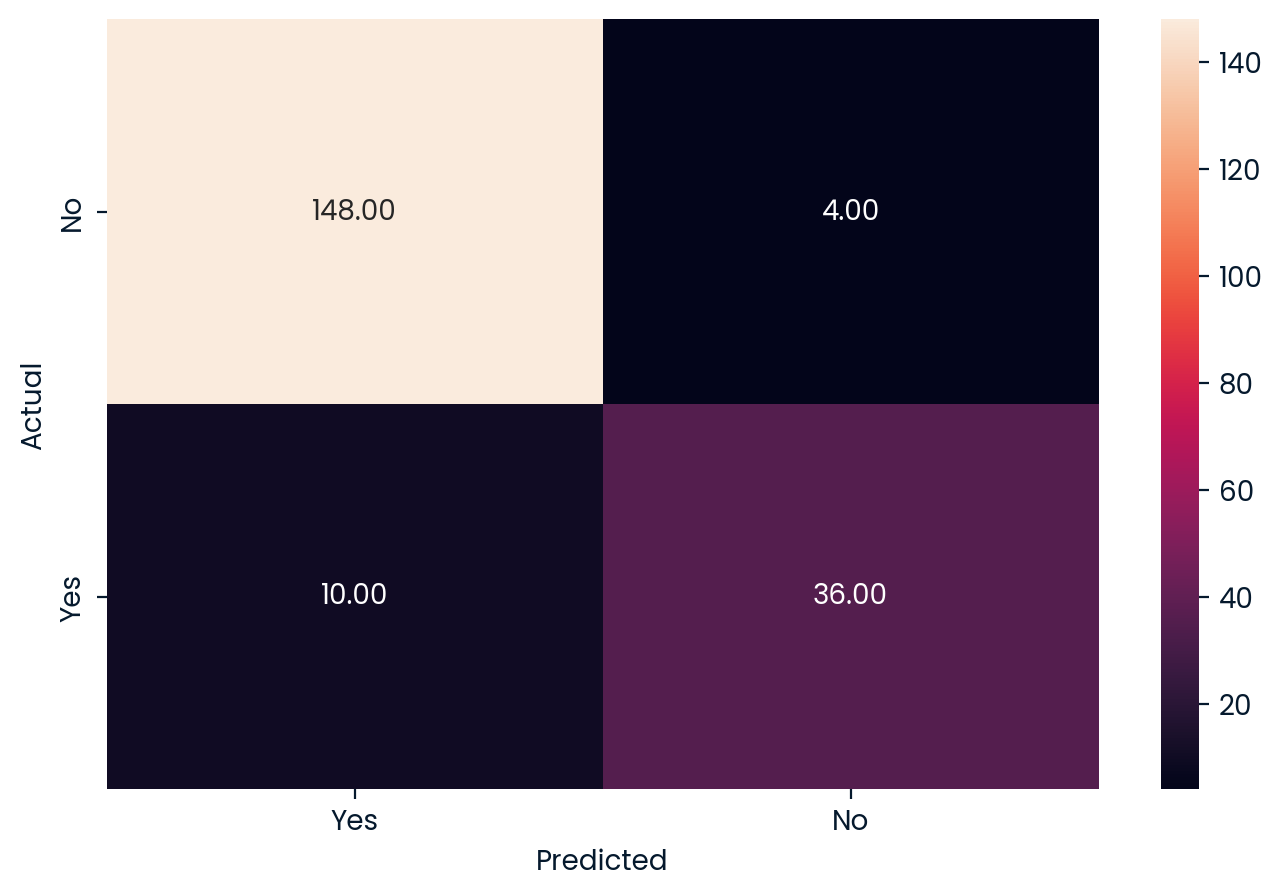

In [262]:
y_pred_test=lg.predict(X_test)
metrics_score(y_pred_test, y_test)

In [263]:
cols=X.columns
coef_lg=lg.coef_
pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False)
odds= np.exp(lg.coef_[0])
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
6_h,1.364176
10,1.299160
11_p,1.232631
7,1.171313
0,1.142248
6_n,1.114287
12,1.112614
9_t,1.039537
11_s,1.036568
3_y,1.007596


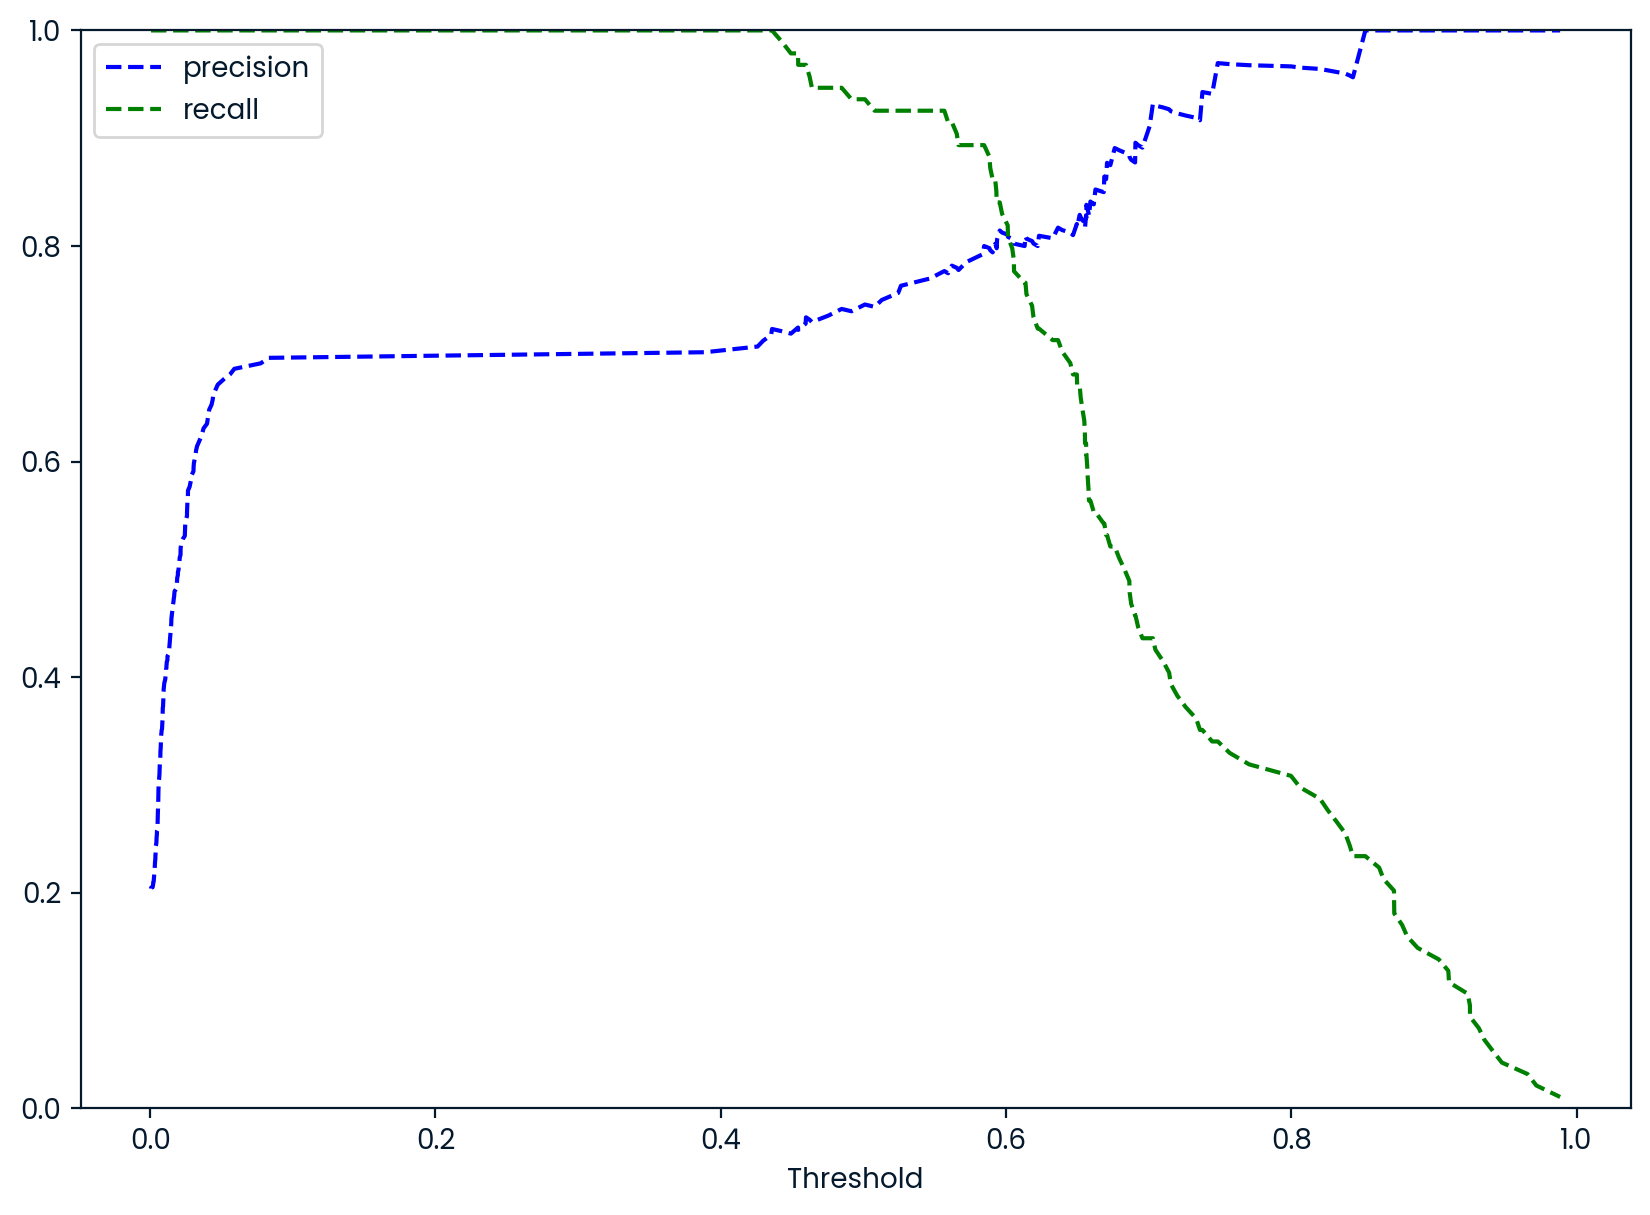

In [264]:
from sklearn.metrics import precision_recall_curve
y_scores_lg = lg.predict_proba(X_train)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [265]:
y_scores_lg[:,1]

array([3.89356503e-03, 7.04743714e-01, 1.20975875e-02, 2.75735315e-03,
       7.22784361e-03, 3.28336678e-02, 1.47449241e-02, 6.47986255e-03,
       9.10613407e-01, 7.00693794e-01, 5.93737407e-01, 9.68159896e-03,
       6.22929498e-04, 3.19591228e-03, 7.49169593e-03, 6.01401726e-03,
       7.35997457e-01, 8.06137160e-01, 6.18272898e-01, 4.59513659e-01,
       6.55117019e-03, 4.41735628e-02, 8.71998915e-01, 2.17362939e-02,
       2.57849024e-02, 4.84767788e-01, 2.57905603e-02, 8.68397783e-03,
       5.12593580e-03, 1.68881771e-02, 3.62671550e-03, 5.59404713e-01,
       5.26551302e-03, 5.40125795e-03, 5.51536315e-03, 3.70260516e-03,
       3.10824900e-03, 2.44127420e-02, 6.19273462e-01, 9.25310831e-01,
       6.73836476e-03, 6.66076315e-03, 4.58696391e-03, 7.62222273e-03,
       2.48081227e-03, 1.99330922e-02, 1.95208498e-03, 6.73142560e-01,
       2.96596032e-03, 3.55121323e-02, 4.38317622e-03, 5.74251424e-03,
       5.97273665e-01, 5.01069396e-01, 2.55555910e-03, 7.99823375e-01,
      

              precision    recall  f1-score   support

       False       0.87      0.99      0.93       367
        True       0.91      0.44      0.59        94

    accuracy                           0.88       461
   macro avg       0.89      0.71      0.76       461
weighted avg       0.88      0.88      0.86       461



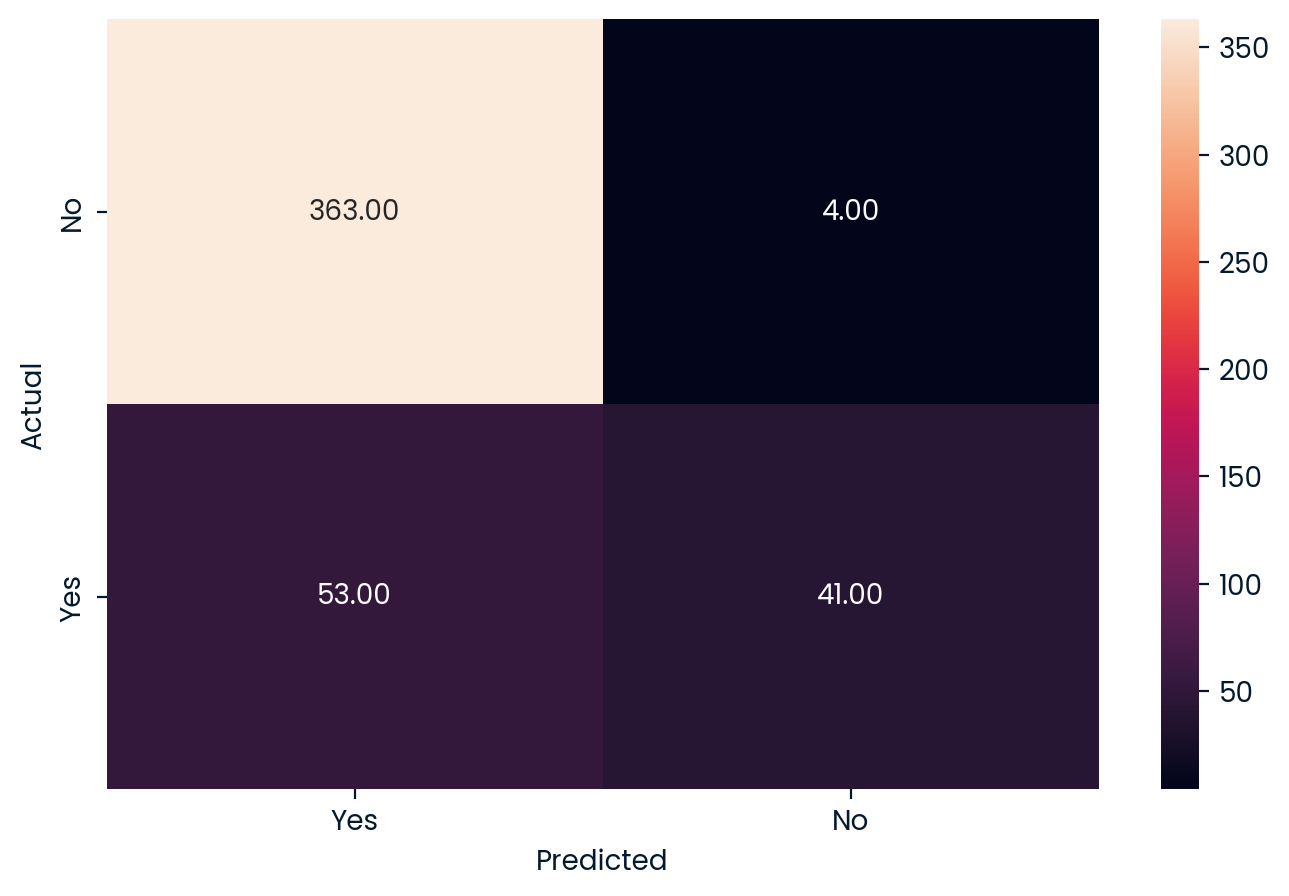

In [266]:
optimal_threshold1=.70
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

       False       0.86      0.97      0.91       158
        True       0.78      0.35      0.48        40

    accuracy                           0.85       198
   macro avg       0.82      0.66      0.70       198
weighted avg       0.84      0.85      0.82       198



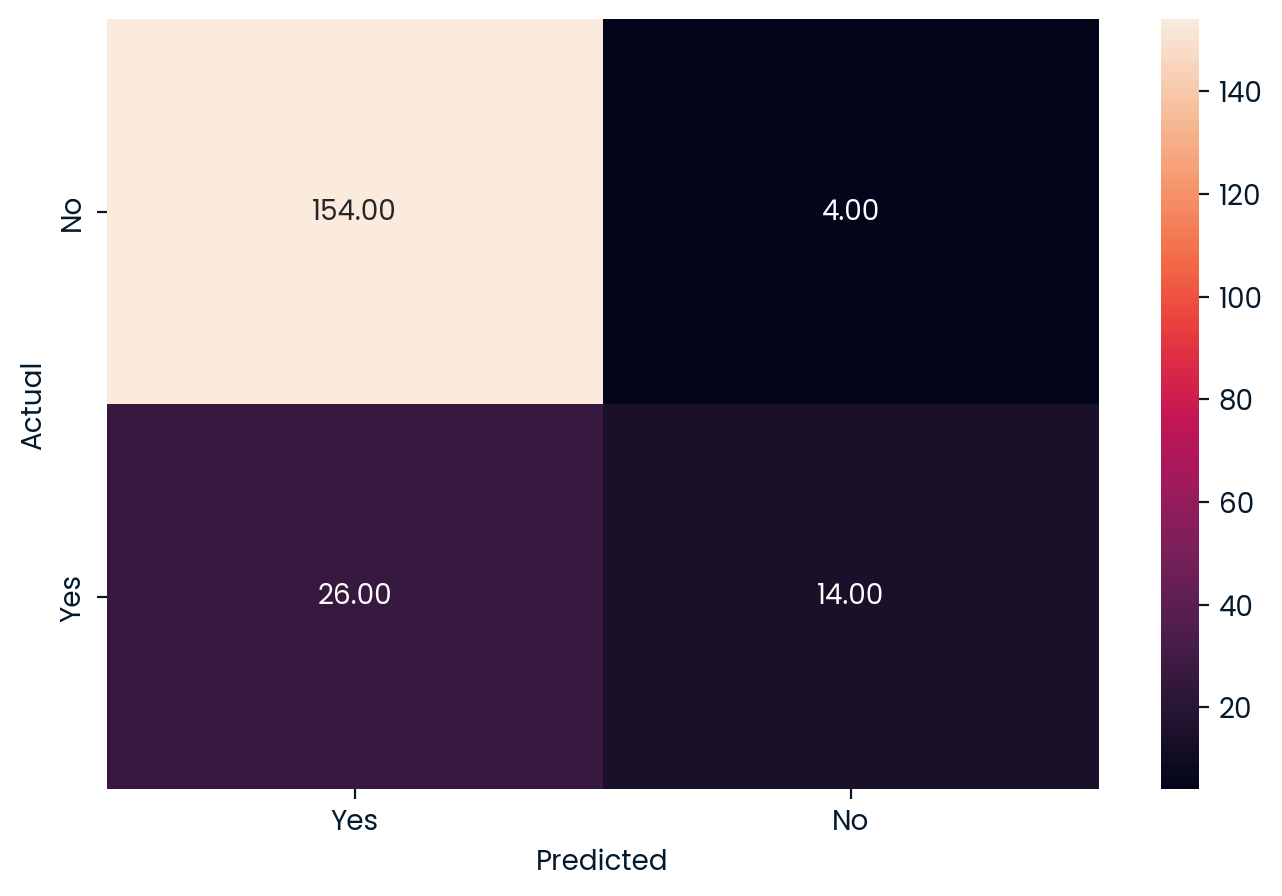

In [267]:
optimal_threshold1=.70
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)


In [268]:
from sklearn.metrics import accuracy_score

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test data
y_pred = lg.predict(X_test)
best_score = accuracy_score(y_test, y_pred)
 